## Download Data

In [31]:
import pandas as pd
import glob
import math
import numpy as np
import matplotlib.pyplot as plt


In [14]:
data_path = 'data/' # TODO: point this to your data folder
# submission_path = data_path + 'submissions/'
training_path = data_path + 'training_set0/'
input_logs = sorted(glob.glob(training_path + "log_0*.csv")) # TODO: point this to a subset of csv's in your training set

In [16]:
input_logs[:3]

['data/training_set0/log_0_20180715_000000000000.csv',
 'data/training_set0/log_0_20180716_000000000000.csv',
 'data/training_set0/log_0_20180717_000000000000.csv']

## 1. Visualize data

In [19]:
df = pd.read_csv(input_logs[0])
print(df.shape)
print(df.columns)
df.head(3)

(2990609, 21) Index(['session_id', 'session_position', 'session_length', 'track_id_clean',
       'skip_1', 'skip_2', 'skip_3', 'not_skipped', 'context_switch',
       'no_pause_before_play', 'short_pause_before_play',
       'long_pause_before_play', 'hist_user_behavior_n_seekfwd',
       'hist_user_behavior_n_seekback', 'hist_user_behavior_is_shuffle',
       'hour_of_day', 'date', 'premium', 'context_type',
       'hist_user_behavior_reason_start', 'hist_user_behavior_reason_end'],
      dtype='object')


,session_id,session_position,session_length,track_id_clean,skip_1,skip_2,skip_3,not_skipped,context_switch,no_pause_before_play,...,long_pause_before_play,hist_user_behavior_n_seekfwd,hist_user_behavior_n_seekback,hist_user_behavior_is_shuffle,hour_of_day,date,premium,context_type,hist_user_behavior_reason_start,hist_user_behavior_reason_end
0,0_00006f66-33e5-4de7-a324-2d18e439fc1e,1,20,t_0479f24c-27d2-46d6-a00c-7ec928f2b539,False,False,False,True,0,0,...,0,0,0,True,16,2018-07-15,True,editorial_playlist,trackdone,trackdone
1,0_00006f66-33e5-4de7-a324-2d18e439fc1e,2,20,t_9099cd7b-c238-47b7-9381-f23f2c1d1043,False,False,False,True,0,1,...,0,0,0,True,16,2018-07-15,True,editorial_playlist,trackdone,trackdone
2,0_00006f66-33e5-4de7-a324-2d18e439fc1e,3,20,t_fc5df5ba-5396-49a7-8b29-35d0d28249e0,False,False,False,True,0,1,...,0,0,0,True,16,2018-07-15,True,editorial_playlist,trackdone,trackdone


## 2. Exploratory analysis
### 2.1 Skip probability by feature

In [21]:
df.skip_2.value_counts()

True     1533436
False    1457173
Name: skip_2, dtype: int64

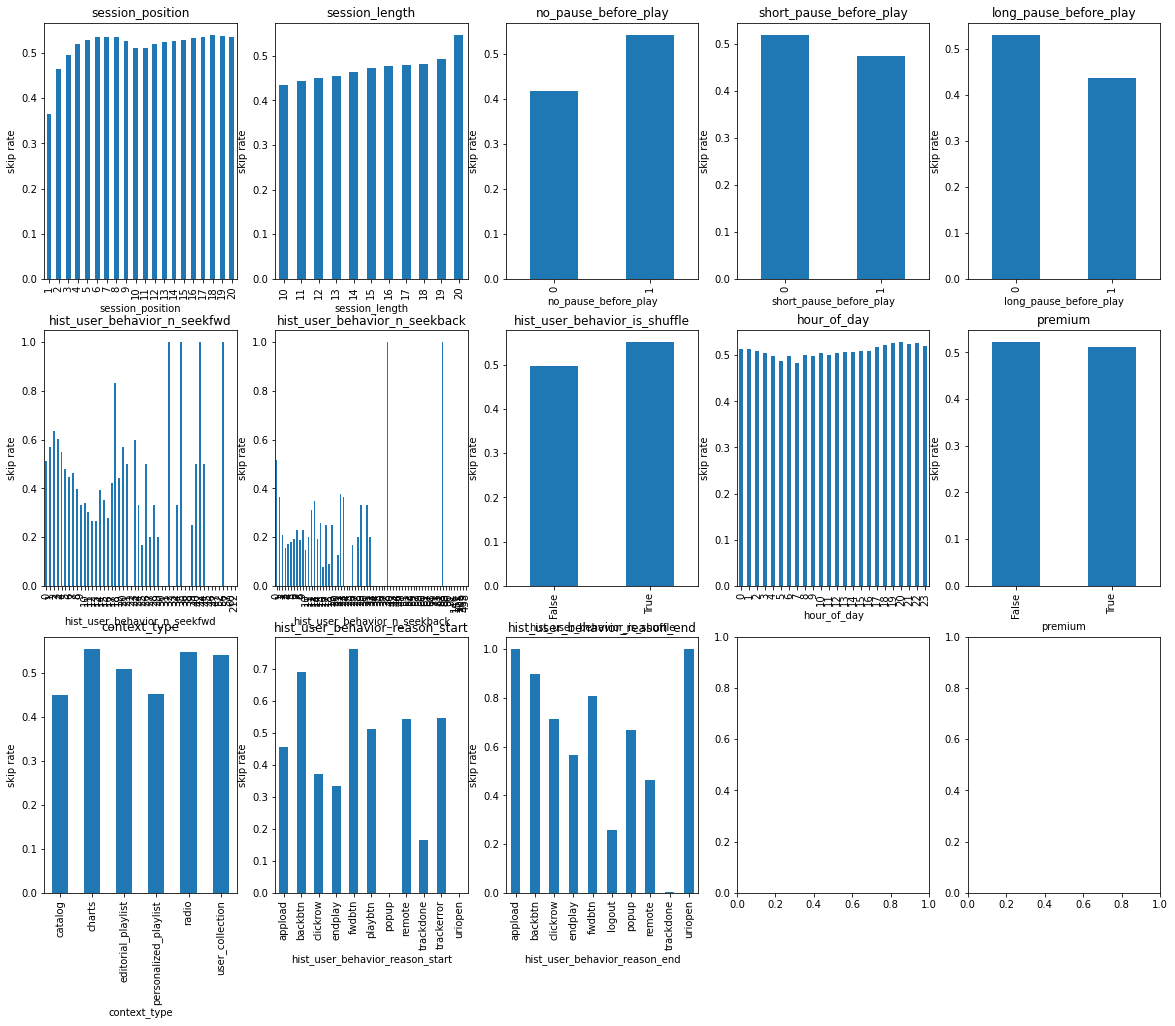

In [40]:
import matplotlib.pyplot as plt
fig, axes = plt.subplots(figsize=(20, 16) , ncols=5, nrows=3)
for i, var in enumerate(['session_position','session_length','no_pause_before_play', 'short_pause_before_play',
       'long_pause_before_play', 'hist_user_behavior_n_seekfwd',
       'hist_user_behavior_n_seekback', 'hist_user_behavior_is_shuffle',
       'hour_of_day', 'premium', 'context_type',
       'hist_user_behavior_reason_start', 'hist_user_behavior_reason_end']):
    r = i//5
    c = i%5
    dfg = df.groupby([var])['skip_2'].mean()
    dfg.plot.bar(title=var, ylabel='skip rate', ax=axes[r,c])
    

### 2.2 Data frequency by feature

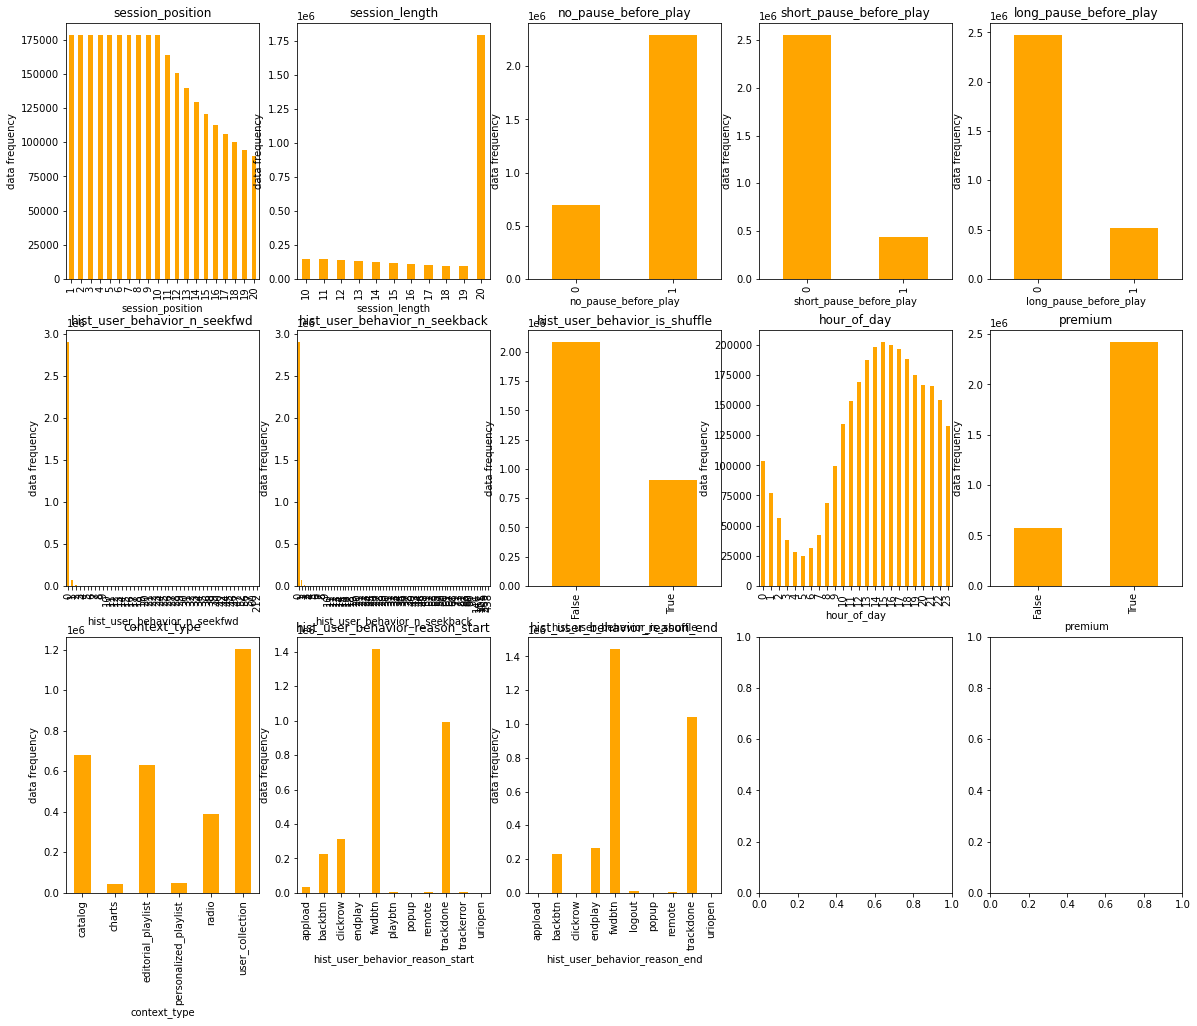

In [43]:
import matplotlib.pyplot as plt
fig, axes = plt.subplots(figsize=(20, 16) , ncols=5, nrows=3)
for i, var in enumerate(['session_position','session_length','no_pause_before_play', 'short_pause_before_play',
       'long_pause_before_play', 'hist_user_behavior_n_seekfwd',
       'hist_user_behavior_n_seekback', 'hist_user_behavior_is_shuffle',
       'hour_of_day', 'premium', 'context_type',
       'hist_user_behavior_reason_start', 'hist_user_behavior_reason_end']):
    r = i//5
    c = i%5
    dfg = df.groupby([var])['skip_2'].count()
    dfg.plot.bar(title=var, ylabel='data frequency', ax=axes[r,c], color='orange')

## 3. Mock data evaluation
Evaluate on random prediction

In [ ]:
3.1 skip rate mean accuracy

In [ ]:
3.2 Sequential prediction accuracy
Divide sequence in half (take floor if odd length), use first half as input, second half as prediction

In [12]:
def get_ground_truth(input_logs):
    ground_truths = []     
    for i,f in enumerate(input_logs):
        df = pd.read_csv(f)
        # Below we keep only the relevant columns of the second half of the session for saving the ground truth
        df = df[['session_id','skip_2','session_position','session_length']].loc[df['session_position']*2 > df['session_length']]
        df = df.reset_index()
        current_index = 0
        # Here we process each session, saving a list containing the 
        while current_index < len(df):
            partial_length = df['session_length'].iloc[current_index]-df['session_position'].iloc[current_index]+1
            session_skips = list(df.loc[current_index:current_index+partial_length-1, 'skip_2'])
            ground_truths.append(session_skips)
            current_index += partial_length 
    return ground_truths